In [0]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('CSV (8).csv')
#This will convert the date which otherwise would hve been a string to a date time object.  We will now get a date-time ind

In [225]:
df.head()

,Date,High,Low
0,02-12-2019,24.420000,23.889999
1,03-12-2019,25.690001,24.530001
2,04-12-2019,26.889999,25.530001
3,05-12-2019,26.660000,25.889999
4,06-12-2019,26.709999,25.940001


In [226]:
df.shape

(100, 3)

In [0]:
import datetime

In [228]:
li= []
for i in range(0, 100):
    l =df['Date'][i].split('-')
    d = ' '
    d = d.join(l)
    d = datetime.datetime.strptime(d, '%d %m %Y').strftime('%m-%d-%Y')
    date_object = datetime.datetime.strptime(d, '%m-%d-%Y').date()
    date_object
    li.append(date_object)
li

[datetime.date(2019, 12, 2),
 datetime.date(2019, 12, 3),
 datetime.date(2019, 12, 4),
 datetime.date(2019, 12, 5),
 datetime.date(2019, 12, 6),
 datetime.date(2019, 12, 9),
 datetime.date(2019, 12, 10),
 datetime.date(2019, 12, 11),
 datetime.date(2019, 12, 12),
 datetime.date(2019, 12, 13),
 datetime.date(2019, 12, 16),
 datetime.date(2019, 12, 17),
 datetime.date(2019, 12, 18),
 datetime.date(2019, 12, 19),
 datetime.date(2019, 12, 20),
 datetime.date(2019, 12, 23),
 datetime.date(2019, 12, 24),
 datetime.date(2019, 12, 26),
 datetime.date(2019, 12, 27),
 datetime.date(2019, 12, 30),
 datetime.date(2019, 12, 31),
 datetime.date(2020, 1, 2),
 datetime.date(2020, 1, 3),
 datetime.date(2020, 1, 6),
 datetime.date(2020, 1, 7),
 datetime.date(2020, 1, 8),
 datetime.date(2020, 1, 9),
 datetime.date(2020, 1, 10),
 datetime.date(2020, 1, 13),
 datetime.date(2020, 1, 14),
 datetime.date(2020, 1, 15),
 datetime.date(2020, 1, 16),
 datetime.date(2020, 1, 17),
 datetime.date(2020, 1, 21),
 date

In [229]:
df['Date']=li
df

,Date,High,Low
0,2019-12-02,24.420000,23.889999
1,2019-12-03,25.690001,24.530001
2,2019-12-04,26.889999,25.530001
3,2019-12-05,26.660000,25.889999
4,2019-12-06,26.709999,25.940001
...,...,...,...
95,2020-04-20,15.410000,14.430000
96,2020-04-21,15.100000,14.340000
97,2020-04-22,15.080000,14.620000
98,2020-04-23,15.220000,14.750000


In [230]:
df.set_index('Date')

,High,Low
Date,,
2019-12-02,24.420000,23.889999
2019-12-03,25.690001,24.530001
2019-12-04,26.889999,25.530001
2019-12-05,26.660000,25.889999
2019-12-06,26.709999,25.940001
...,...,...
2020-04-20,15.410000,14.430000
2020-04-21,15.100000,14.340000
2020-04-22,15.080000,14.620000


In [0]:
df['new']= ((df['High']+df['Low'])/2)

In [232]:
df.head()

,Date,High,Low,new
0,2019-12-02,24.420000,23.889999,24.155000
1,2019-12-03,25.690001,24.530001,25.110001
2,2019-12-04,26.889999,25.530001,26.210000
3,2019-12-05,26.660000,25.889999,26.274999
4,2019-12-06,26.709999,25.940001,26.325000


In [0]:
df.drop('High',axis=1,inplace=True)

In [0]:
df.drop('Low',axis=1,inplace=True)

In [0]:
df=df.set_index('Date')

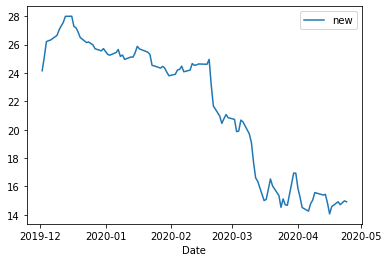

In [236]:
df.plot()

In [373]:
# a variable for predicting 'n' days out in the future
forecast_out = 15
# Create one more column shifted 'n' units up
df['Prediction'] = df[['new']].shift(-forecast_out)
df

,new,Prediction
Date,,
2019-12-02,24.155000,26.144999
2019-12-03,25.110001,26.184999
2019-12-04,26.210000,25.985000
2019-12-05,26.274999,25.710000
2019-12-06,26.325000,25.560000
...,...,...
2020-04-20,14.920000,NaN
2020-04-21,14.720000,NaN
2020-04-22,14.850000,NaN


In [374]:
#Create the independent dataset(X)
#Convert the dataframe to NUmpy array
X = np.array(df.drop(['Prediction'], 1))
#REmove the last 'n' rows
X = X[:-forecast_out]
print(X)

[[24.1549995]
 [25.110001 ]
 [26.21     ]
 [26.2749995]
 [26.325    ]
 [26.6449995]
 [27.035001 ]
 [27.315    ]
 [27.5699995]
 [27.995    ]
 [28.       ]
 [27.29     ]
 [27.185    ]
 [26.8899995]
 [26.5      ]
 [26.1449995]
 [26.1849995]
 [25.9849995]
 [25.71     ]
 [25.56     ]
 [25.72     ]
 [25.3100005]
 [25.255    ]
 [25.445    ]
 [25.6550005]
 [25.17     ]
 [25.2649995]
 [24.96     ]
 [25.125    ]
 [25.12     ]
 [25.4299995]
 [25.8800005]
 [25.7      ]
 [25.464999 ]
 [25.3000005]
 [24.535    ]
 [24.5      ]
 [24.3450005]
 [24.465    ]
 [24.339999 ]
 [24.045    ]
 [23.8050005]
 [23.9099995]
 [24.21     ]
 [24.25     ]
 [24.4799995]
 [24.085    ]
 [24.2049995]
 [24.665    ]
 [24.5399995]
 [24.5699995]
 [24.6350005]
 [24.615    ]
 [24.959999 ]
 [23.125    ]
 [21.675    ]
 [20.965    ]
 [20.445001 ]
 [20.775    ]
 [21.0699995]
 [20.8450005]
 [20.7299995]
 [19.865    ]
 [19.910001 ]
 [20.6800005]
 [20.5550005]
 [19.71     ]
 [19.0850005]
 [17.71     ]
 [16.6099995]
 [16.355    ]
 [15.0

In [376]:
#Create the dependent dataset(y)
# Convert dataframe to numpy array (All of the values including NaN)
y = np.array(df['Prediction'])

#Get all of the y values except the last n rows
y = y[:-forecast_out]
print(y)

[26.1449995 26.1849995 25.9849995 25.71      25.56      25.72
 25.3100005 25.255     25.445     25.6550005 25.17      25.2649995
 24.96      25.125     25.12      25.4299995 25.8800005 25.7
 25.464999  25.3000005 24.535     24.5       24.3450005 24.465
 24.339999  24.045     23.8050005 23.9099995 24.21      24.25
 24.4799995 24.085     24.2049995 24.665     24.5399995 24.5699995
 24.6350005 24.615     24.959999  23.125     21.675     20.965
 20.445001  20.775     21.0699995 20.8450005 20.7299995 19.865
 19.910001  20.6800005 20.5550005 19.71      19.0850005 17.71
 16.6099995 16.355     15.005     15.09      15.795     16.53
 16.04      15.365     14.53      15.125     14.705     14.675
 16.945     16.935     15.8699995 15.245     14.515     14.26
 14.785     15.04      15.57      15.395     15.445     14.82
 14.065     14.585     14.92      14.72      14.85      14.985
 14.92     ]


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [0]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [380]:
#Create and train the Polynomial REgression Model
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
#plt.scatter(X, y, color = 'red')
#plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
#plt.title('Truth or Bluff (Polynomial Regression)')
#plt.xlabel('Position level')
#plt.ylabel('Salary')
#plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [381]:
#Testing Model
pr_confidence = lin_reg_2.score(poly_reg.fit_transform(x_test), y_test)
print(pr_confidence)

0.9320567594179572


In [0]:
predictionss = lin_reg_2.predict(poly_reg.fit_transform(x_test))

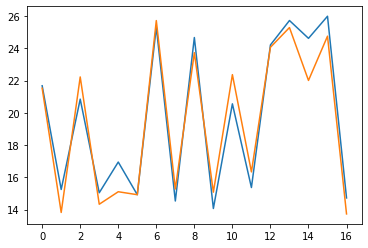

In [388]:
plt.plot(y_test)
plt.plot(predictionss)
plt.show()

In [382]:
# set x_forecast equal to the last 10 rows of the original dataset
x_forecast = np.array(df.drop(['Prediction'], 1))[-forecast_out:]
print(x_forecast)

[[14.515]
 [14.26 ]
 [14.785]
 [15.04 ]
 [15.57 ]
 [15.395]
 [15.445]
 [14.82 ]
 [14.065]
 [14.585]
 [14.92 ]
 [14.72 ]
 [14.85 ]
 [14.985]
 [14.92 ]]


In [383]:
# Print the predictions for the next n days
lr_prediction = lin_reg_2.predict(poly_reg.fit_transform(x_forecast))
print(lr_prediction)

[16.04417359 16.53333905 15.5817252  15.1958355  14.5453927  14.73808356
 14.68084528 15.52586893 16.94269134 15.91886609 15.37137216 15.68792946
 15.47872973 15.27496337 15.37137216]


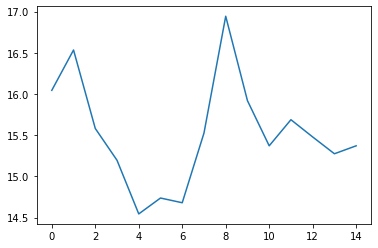

In [384]:
plt.plot(lr_prediction)

In [391]:
forecast_index = pd.date_range(start='2020-04-25',periods=15)
forecast_index

DatetimeIndex(['2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02',
               '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08', '2020-05-09'],
              dtype='datetime64[ns]', freq='D')

In [0]:
forecast_df = pd.DataFrame(data=lr_prediction,index=forecast_index,
                           columns=['Forecast'])

In [393]:
forecast_df

,Forecast
2020-04-25,16.044174
2020-04-26,16.533339
2020-04-27,15.581725
2020-04-28,15.195835
2020-04-29,14.545393
2020-04-30,14.738084
2020-05-01,14.680845
2020-05-02,15.525869
2020-05-03,16.942691
2020-05-04,15.918866


In [0]:
df.drop('Prediction',axis=1,inplace=True)

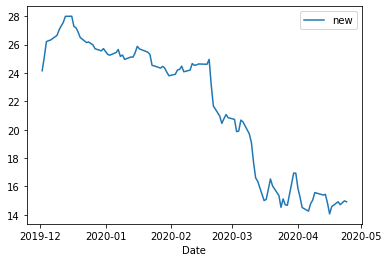

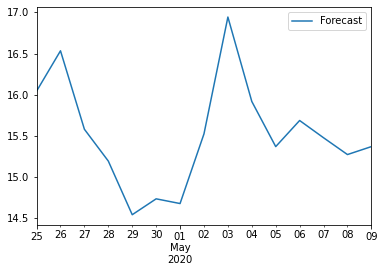

In [398]:
df.plot()
forecast_df.plot()

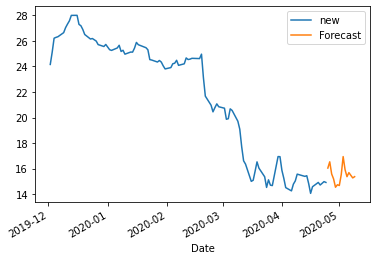

In [399]:
ax = df.plot()
forecast_df.plot(ax=ax)